___

# Machine Learning in Geosciences ] 
Department of Applied Geoinformatics and Carthography, Charles University

Lukas Brodsky lukas.brodsky@natur.cuni.cz


## Fundamental Algorithms Benchnark


The benchmark shall asure that you: 

* 1. Split training and test data; 

* 2. Use the identical train/test split(s) acros seach algorithm being tested; 

TODO:

* 3. Do multiple train/test splits; 

* 4. Use more than five different datasets; 


# Setup

In [1]:
# Common imports for reading, visualizing
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# preprocessing data
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Classifiers
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.neural_network import MLPClassifier

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

## Get data


In [2]:
# create synthetic data set
X, y = make_classification(n_samples = 1000, n_features = 10, n_informative = 5,
                            n_redundant = 5,  class_sep = 1.0,
                            random_state = 42, shuffle = False)

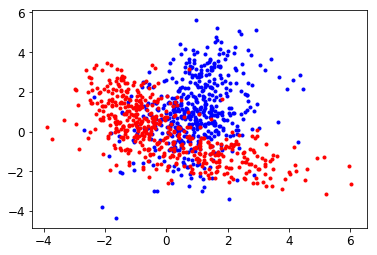

In [9]:
plt.plot(X[(y==0),0], X[(y==0),1], 'b.')
plt.plot(X[(y==1),0], X[(y==1),1], 'r.')

In [10]:
# Numpy array to pandas dataframe
labels = [f"Feature {ii+1}" for ii in range(X.shape[1])]
X = pd.DataFrame(X, columns = labels)
y = pd.DataFrame(y, columns = ["Target"])

In [ ]:
# TODO: add more datasets 
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)

# X, y = make_moons(noise=0.5, random_state=42, n_samples = 1000)
# ds1 = make_moons(noise=0.3, random_state=0)
# ds2 = make_circles(noise=0.2, factor=0.5, random_state=1)
# ds3 = linearly_separable

## Create train and test set    

In [33]:
# test 20 % 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40,
                                                    random_state = 42) 

In [12]:
X_train.shape

(800, 10)

In [13]:
X_test.shape

(200, 10)

In [15]:
np.unique(y_train)

array([0, 1])

## Clasifiers

In [16]:
classifiers = {}
classifiers.update({"DTC": DecisionTreeClassifier()})
classifiers.update({"LSVC": LinearSVC()})
classifiers.update({"SVC": SVC()})
classifiers.update({"Random Forest": RandomForestClassifier()})
classifiers.update({"AdaBoost": AdaBoostClassifier()})
classifiers.update({"Extra Trees Ensemble": ExtraTreesClassifier()})
# classifiers.update({"Gradient Boosting": GradientBoostingClassifier()})
# classifiers.update({"MLP": MLPClassifier()})

In [17]:
# Create dict of decision function labels
DECISION_FUNCTIONS = {"LSVC", "SVC"}

# Create dict for classifiers with feature_importances_ attribute
FEATURE_IMPORTANCE = {"Gradient Boosting", "Extra Trees Ensemble", "Random Forest"}


## Hyper-parameters

In [22]:
# Initiate parameter grid
parameters = {}


# Update dict with Decision Tree Classifier
parameters.update({"DTC": {
                            "classifier__max_depth" : [1, 2, 3, 4, 5, 6, 7, 8],
                            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                             }})

parameters.update({"LSVC": {
                            "classifier__C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]
                             }})

parameters.update({"SVC": {
                            "classifier__kernel": ["linear", "rbf", "poly"],
                            "classifier__gamma": ["auto"],
                            "classifier__C": [0.1, 0.5, 1, 5, 10, 50, 100],
                            "classifier__degree": [1, 2, 3, 4, 5, 6]
                             }})

# Update dict with Random Forest Parameters
parameters.update({"Random Forest": {
                                    "classifier__n_estimators": [400],
                                    "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                    "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                    "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                    "classifier__n_jobs": [-1]
                                     }})


# Update dict with Extra Trees
parameters.update({"Extra Trees Ensemble": {
                                            "classifier__n_estimators": [400],
                                            "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                            "classifier__n_jobs": [-1]
                                             }})

# Update dict with AdaBoost
parameters.update({"AdaBoost": {
                                "classifier__base_estimator": [DecisionTreeClassifier(max_depth = ii) for ii in range(1,6)],
                                "classifier__n_estimators": [400],
                                "classifier__learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0]
                                 }})

# Update dict with Gradient Boosting
# "classifier__subsample": [0.8, 0.9, 1]
parameters.update({"Gradient Boosting": {
                                        "classifier__learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001],
                                        "classifier__n_estimators": [400],
                                        "classifier__max_depth": [2,3,4,5,6],
                                        "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                        "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10]                                        
                                         }})

# Update dict with MLPClassifier
parameters.update({"MLP": {
                            "classifier__hidden_layer_sizes": [(5), (10), (5,5), (10,10), (5,5,5), (10,10,10)],
                            "classifier__activation": ["identity", "logistic", "tanh", "relu"],
                            "classifier__learning_rate": ["constant", "invscaling", "adaptive"],
                            "classifier__max_iter": [100, 200, 300, 500, 1000, 2000],
                            "classifier__alpha": list(10.0 ** -np.arange(1, 10)),
                             }})

## Classifier Tuning and Evaluation  

In [35]:
classifiers.items()

dict_items([('DTC', DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.01,
                       min_samples_split=0.01)), ('LSVC', LinearSVC()), ('SVC', SVC(C=10, degree=1, gamma='auto')), ('Random Forest', RandomForestClassifier(max_depth=6, min_samples_leaf=0.005,
                       min_samples_split=0.005, n_estimators=200, n_jobs=-1)), ('AdaBoost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=200)), ('Extra Trees Ensemble', ExtraTreesClassifier(max_depth=8, min_samples_leaf=0.005,
                     min_samples_split=0.01, n_estimators=200, n_jobs=-1))])

In [36]:
classifier_label = 'Random Forest'

In [37]:
classifier = classifiers[classifier_label]

In [34]:
# Initialize dictionary to store results
results = {}

# Tune and evaluate classifiers
for classifier_label, classifier in classifiers.items():
    # Print message to user
    print(f"Now tuning {classifier_label}.")

    # Scale features via Z-score normalization
    scaler = StandardScaler()

    # Define steps in pipeline
    steps = [("scaler", scaler), ("classifier", classifier)]

    # Initialize Pipeline object
    pipeline = Pipeline(steps = steps)

    # Define parameter grid
    param_grid = parameters[classifier_label]

    # Initialize GridSearch object
    gscv = GridSearchCV(pipeline, param_grid, cv = 5, n_jobs = -1, verbose = 1, scoring = "roc_auc")

    # Fit gscv
    gscv.fit(X_train, np.ravel(y_train))

    # Get best parameters and score
    best_params = gscv.best_params_
    best_score = gscv.best_score_
    print(best_params)

    # Update classifier parameters and define new pipeline with tuned classifier
    tuned_params = {item[12:]: best_params[item] for item in best_params}
    # pass model parameters 
    classifier.set_params(**tuned_params)

    # Make predictions
    # if classifier_label in DECISION_FUNCTIONS:
        # y_pred = gscv.decision_function(X_test)
    # else:
        # y_pred = gscv.predict_proba(X_test)[:, 1]
    y_pred = gscv.predict(X_test)

    # Evaluate model
    # TODO add f1-score, et al. 
    auc = metrics.roc_auc_score(y_test, y_pred)
    # f1  = metrics.f1_score(y_test, y_pred) 
    # acc = metrics.accuracy_score(y_test, y_pred)
    # rec = metrics.recall_score(y_test, y_pred)
    # prc = metrics.precision_score(y_test, y_pred)

    # Save results
    result = {"Classifier": gscv,
              "Best Parameters": best_params,
              "Training AUC": best_score,
              "Test AUC": auc # , 
              # "Test F1": f1, 
              # "Test Accuracy": acc, 
              # "Test Recall": rec, 
              # "Test Precision": prc
             }

    # save grid search to file (pickle) 

    results.update({classifier_label: result})

Now tuning DTC.
Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'classifier__max_depth': 4, 'classifier__min_samples_leaf': 0.01, 'classifier__min_samples_split': 0.01}
Now tuning LSVC.
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'classifier__C': 1.0}
Now tuning SVC.
Fitting 5 folds for each of 126 candidates, totalling 630 fits
{'classifier__C': 10, 'classifier__degree': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Now tuning Random Forest.
Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'classifier__max_depth': 6, 'classifier__min_samples_leaf': 0.005, 'classifier__min_samples_split': 0.005, 'classifier__n_estimators': 200, 'classifier__n_jobs': -1}
Now tuning AdaBoost.
Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'classifier__base_estimator': DecisionTreeClassifier(max_depth=3), 'classifier__learning_rate': 1.0, 'classifier__n_estimators': 200}
Now tuning Extra Trees Ensemble.
Fitting 5 folds for each 

In [38]:
print(best_params)


{'classifier__max_depth': 8, 'classifier__min_samples_leaf': 0.005, 'classifier__min_samples_split': 0.01, 'classifier__n_estimators': 200, 'classifier__n_jobs': -1}


## Visualing Results 

In [39]:
train_auc = []
test_auc = []
index = []
for classifier_label in results:
    train_auc.append(results[classifier_label]["Training AUC"])
    test_auc.append(results[classifier_label]["Test AUC"])
    index.append(classifier_label)

In [40]:
index

['DTC', 'LSVC', 'SVC', 'Random Forest', 'AdaBoost', 'Extra Trees Ensemble']

In [41]:
cls_scores = pd.DataFrame({
    "Train": train_auc, 
    "Test": test_auc  
    }, 
    index=index
)

In [42]:
cls_scores

,Train,Test
DTC,0.939243,0.895140
LSVC,0.878487,0.820432
SVC,0.982329,0.947470
Random Forest,0.975718,0.915342
AdaBoost,0.983275,0.932568
Extra Trees Ensemble,0.974496,0.930193


Text(0, 0.5, 'AUC')

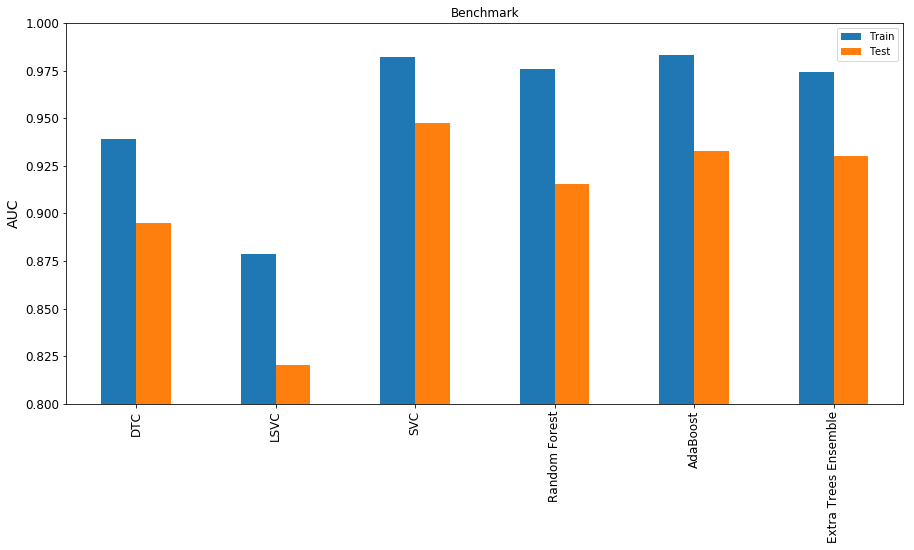

In [43]:
cls_scores.plot(kind="bar", figsize=(15,7), ylim=(0.8,1.0))
plt.title("Benchmark")
plt.ylabel("AUC")